<a href="https://colab.research.google.com/github/joemah/tensor/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [0]:
#decoding back to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [8]:
train_labels[10]

3

In [0]:
#preparing the data 
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:

def to_one_hot(labels, dimension= 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [0]:
onte_hot_train_labels  = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models 
from  keras import layers

model  = models.Sequential()
model.add(layers.Dense(46, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(46, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



In [24]:
#training the model

history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 200us/step - loss: 3.8119 - acc: 0.0663 - val_loss: 3.7980 - val_acc: 0.0460
Epoch 2/20
7982/7982 [==============================] - 1s 111us/step - loss: 3.7881 - acc: 0.0484 - val_loss: 3.7770 - val_acc: 0.0460
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 3.7676 - acc: 0.1532 - val_loss: 3.7570 - val_acc: 0.3530
Epoch 4/20
7982/7982 [==============================] - 1s 110us/step - loss: 3.7477 - acc: 0.3343 - val_loss: 3.7373 - val_acc: 0.2220
Epoch 5/20
7982/7982 [==============================] - 1s 112us/step - loss: 3.7280 - acc: 0.2200 - val_loss: 3.7177 - val_acc: 0.2220
Epoch 6/20
7982/7982 [==============================] - 1s 113us/step - loss: 3.7084 - acc: 0.2552 - val_loss: 3.6983 - val_acc: 0.2220
Epoch 7/20
7982/7982 [============

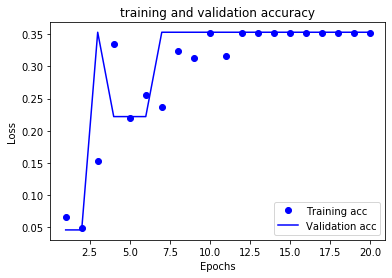

In [27]:
#plotting training and validation loss

import matplotlib.pyplot as plt

loss =  history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

plt.clf() #clears the figure

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()